In [13]:
df= pd.read_csv('/content/Final_data.csv')
df.head()

,budget,original_title,overview,popularity,runtime,revenue,release_year,release_month,release_day,profit,...,Türkçe,Český,العربية,हिन्दी,தமிழ்,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,500000,May,Psychological horror about a lonely young woma...,8.398158,93.0,1.502770e+05,2002.0,1.0,13.0,-3.497230e+05,...,0,0,0,0,0,0,0,0,0,0
1,2300000,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,88.0,2.209826e+06,1996.0,9.0,6.0,-9.017376e+04,...,0,0,0,0,0,0,0,0,0,0
2,0,'71,A young British soldier must find his way back...,7.080550,99.0,1.625847e+06,2014.0,10.0,10.0,1.625847e+06,...,0,0,0,0,0,0,0,0,0,0
3,2000000,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,95.0,2.460083e+07,1981.0,12.0,24.0,2.260083e+07,...,0,0,0,0,0,0,0,0,0,0
4,52000000,Apollo 13,The true story of technical troubles that scut...,18.761467,140.0,1.809885e+08,1995.0,6.0,30.0,1.197271e+08,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/l

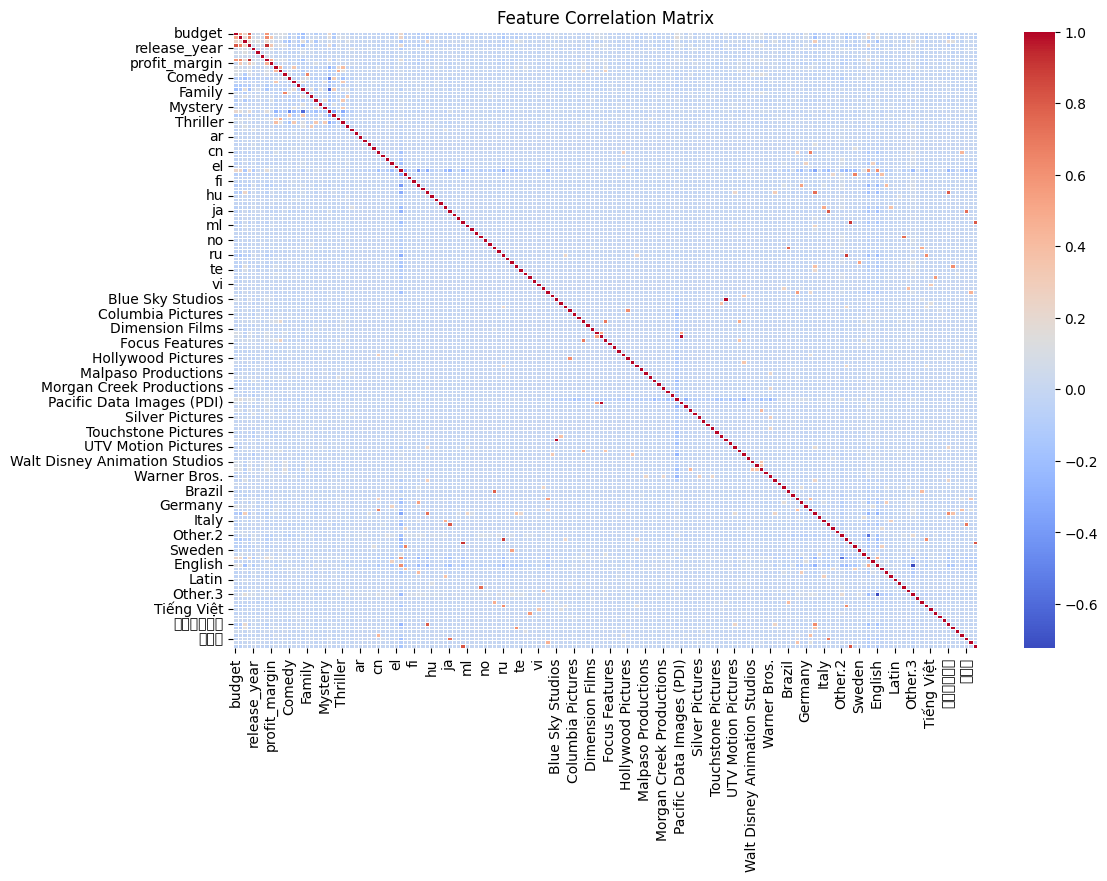

[('profit', 'revenue', 0.9384513490379368),
 ('Pacific Data Images (PDI)', 'DreamWorks SKG', 1.0),
 ('Twentieth Century Fox Animation', 'Blue Sky Studios', 1.0),
 ('Russia', 'ru', 0.900975955123709),
 ('South Korea', 'ko', 0.9163241685789693)]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns again
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns since they cannot be used in correlation calculations
df_numeric = df.drop(columns=non_numeric_columns)

# Compute the correlation matrix again
correlation_matrix = df_numeric.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated feature pairs (correlation above 0.9)
high_correlation_pairs = []
threshold = 0.9

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated feature pairs
high_correlation_pairs


In [6]:
# Step 1: Selecting only numerical (quantitative) columns
numerical_df = df.select_dtypes(include=[np.number]).dropna()

# Step 2: Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_df)

# Step 3: Apply PCA with n_components=2 and n_components=3
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

pca_2_result = pca_2.fit_transform(normalized_data)
pca_3_result = pca_3.fit_transform(normalized_data)

# Step 4: Variance explained by each PCA component
variance_2D = np.sum(pca_2.explained_variance_ratio_) * 100
variance_3D = np.sum(pca_3.explained_variance_ratio_) * 100

# Step 5: Determine dimensions needed to retain 95% variance
pca_full = PCA().fit(normalized_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
dimensions_needed = np.argmax(cumulative_variance >= 0.95) + 1

# Step 6: Extract top 3 eigenvalues
top_3_eigenvalues = pca_full.explained_variance_[:3]

# Display results
results = {
    "Variance retained in 2D PCA (%)": variance_2D,
    "Variance retained in 3D PCA (%)": variance_3D,
    "Dimensions needed for 95% variance": dimensions_needed,
    "Top 3 Eigenvalues": top_3_eigenvalues
}

results


{'Variance retained in 2D PCA (%)': 4.867250597998697,
 'Variance retained in 3D PCA (%)': 6.585742557780747,
 'Dimensions needed for 95% variance': 133,
 'Top 3 Eigenvalues': array([4.65741593, 3.47199158, 2.8702696 ])}

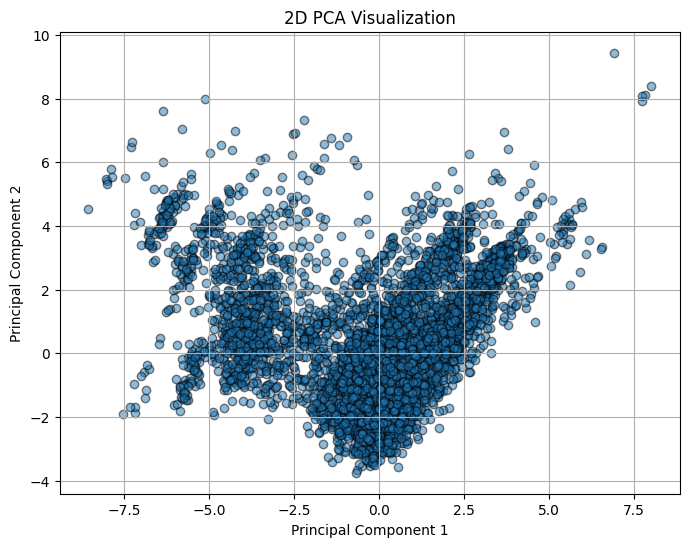

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], alpha=0.5, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.grid(True)
plt.show()


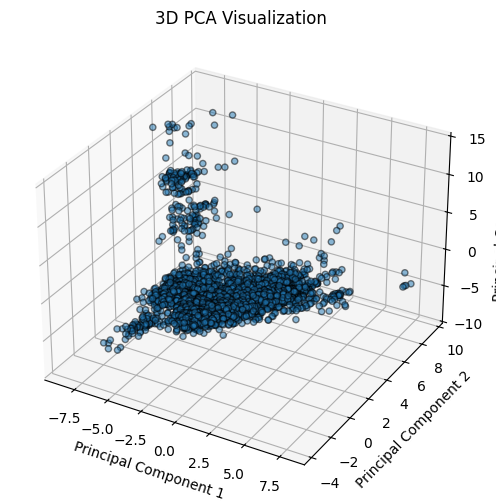

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_result[:, 0], pca_3_result[:, 1], pca_3_result[:, 2], alpha=0.5, edgecolors='k')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization")
plt.show()


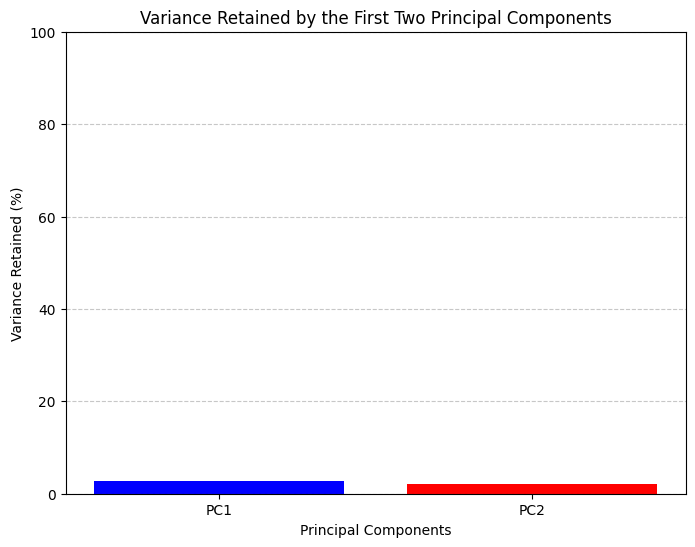

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(["PC1", "PC2"], pca_2.explained_variance_ratio_ * 100, color=['blue', 'red'])
plt.xlabel("Principal Components")
plt.ylabel("Variance Retained (%)")
plt.title("Variance Retained by the First Two Principal Components")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


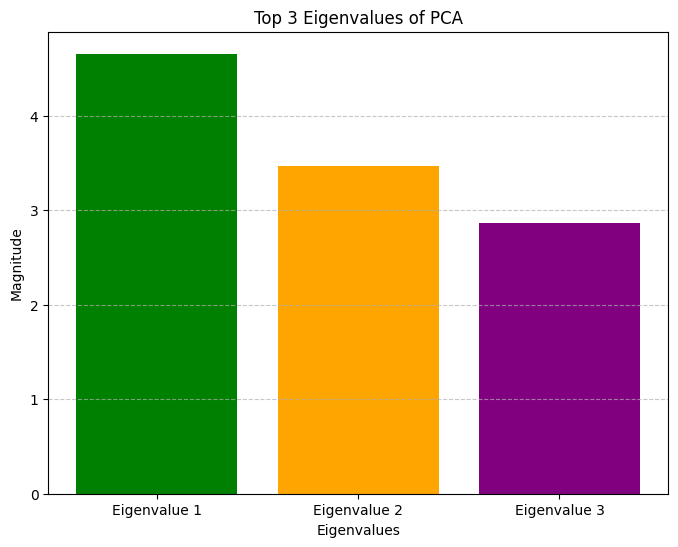

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(["Eigenvalue 1", "Eigenvalue 2", "Eigenvalue 3"], top_3_eigenvalues, color=['green', 'orange', 'purple'])
plt.xlabel("Eigenvalues")
plt.ylabel("Magnitude")
plt.title("Top 3 Eigenvalues of PCA")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
